In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

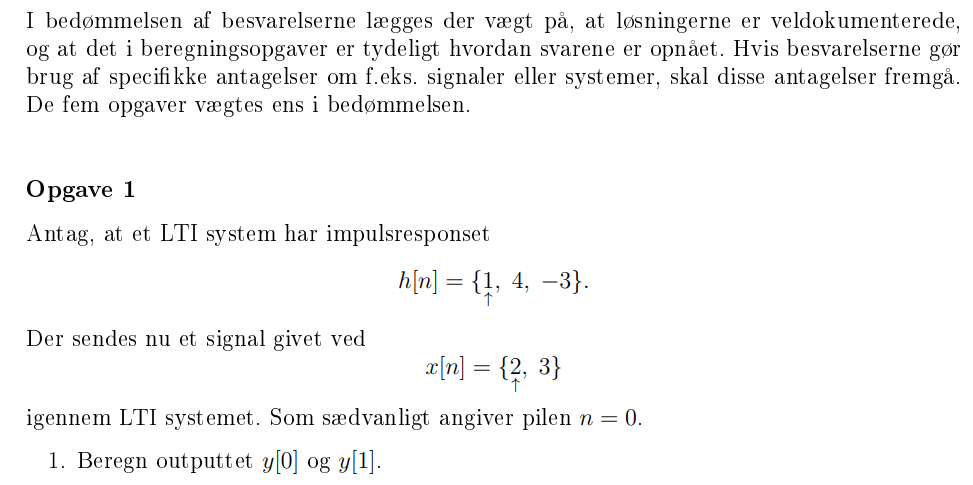

Et LTI system's output kan findes ved hjælp af impulserespons og et arbitret signal hvor:

\begin{align*}
    y[n]&=x[n]*h[n]
\end{align*}

Hvor foldningen $x[n]$ og $h[n]$ kan findes således

$x[n]*h[h]=\sum _{k=-\infty} ^{+\infty} x[k]\cdot h[n-k]$

Derfor starter jeg med at finde h[-n], som findes ved at spejle h[n] over y-aksen

Dette giver $h[-n]=\{-3,4,1\}$ hvor n=0 er i det sidste index hvor $h[-n]=1$

til tiden n=0, er der partial overlap mellem x[n] og h[n], hvor x[n]=2 og h[n]=1 ovelapper, hvilket giver y[0]=2:

$$ y[0]=2\cdot 1 = 2$$

for at finde y[1], skal h[1-k] bruges hvilket giver 2 overlap x[n]=2 og h[n]=4. Og x[n]=3 og h[n]=1. hvilket giver y[1]=11

$$ y[1]=2\cdot 4 + 3\cdot 1 = 11$$

In [3]:
#smart for at tjekke resultatet til eksamen
h=np.array([1.,4,-3])
x=np.array([2.,3])
np.convolve(x,h)

array([ 2., 11.,  6., -9.])

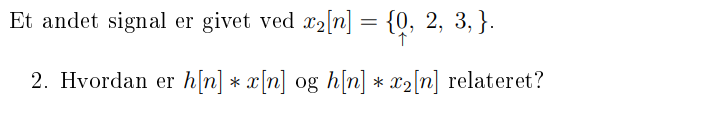

signalet x_2[n] er x[n] forsinket en gang, d.v.s

$x_2[n]=x[n-1]$

Da systemet er LTI er det tidsinvariant, hvilket betyder at $y[n-1]=h[n]*x [n+1]=h[n]*x_2 [n-1]$

In [4]:
#man kan lave det samme som i 1.1, men dette viser, det samme
x2=np.array([0.,2,3])
np.convolve(x2,h)

array([ 0.,  2., 11.,  6., -9.])

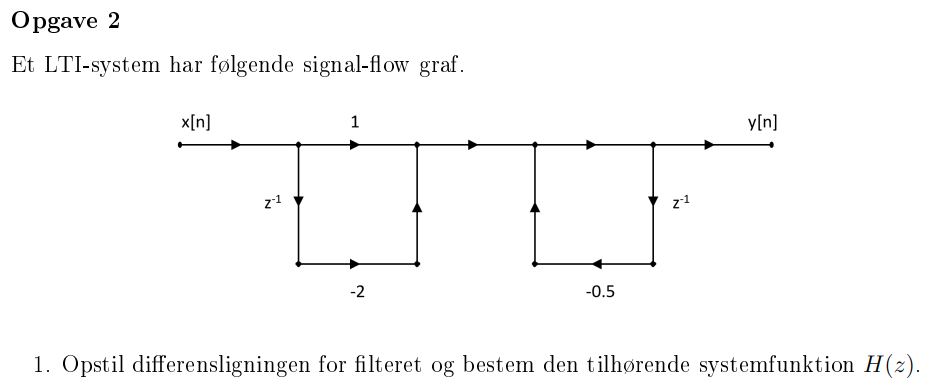

\begin{align*}
    y[n]&=x[n]-2x[n-1]-0.5y[n-1]\\
    &\xrightarrow{\text{Z-transform}}\\
    Y(z)&=X(z)-2z^{-1}X(z)-0.5z^{-1}Y(z)\\
    Y(z)(1+0.5z^{-1})&=X(z)(1-2z^{-1})\\\\
    \frac{Y(z)}{X(z)}&=H(z)=\frac{1-2z^{-1}}{1+0.5z^{-1}}\\
    &=\frac{z-2}{z+0.5}
\end{align*}

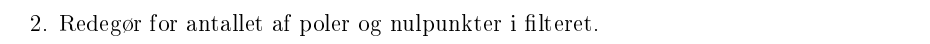

Systemfunktionen $H(z)$ kan ganges med $\frac{z}{z}$, hvor den kommer til at se sådan ud: $\frac{z-2}{z+0.5}$, hvilket giver 1 pol i $z\rightarrow -0.5$ og et nulpunkt i $z=2$

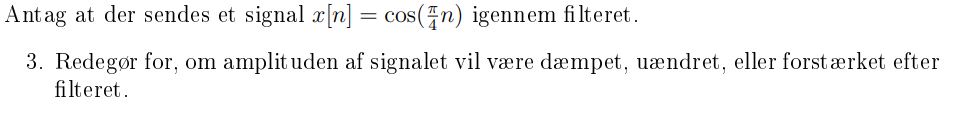

Evalueres på enhedscirkelen
$H(e^{jw}) = H(z) \rvert_{z=e^{jw}}=\frac{1-2e^{-jw}}{1+0.5e^{-jw}}$

1.053367569223259

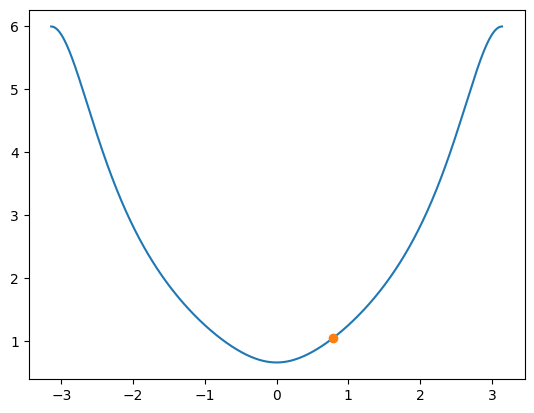

In [5]:
def x(n):
    return np.cos(np.pi*0.25*n)
sig=np.zeros(50)
omega = np.linspace(-np.pi,np.pi,1000)

def H(o):
    return (1-2*np.exp(-1j*o))/(1+0.5*np.exp(-1j*o))
bruh = H(np.pi/4)
fig,ax =plt.subplots()
ax.plot(omega,np.abs(H(omega)))
ax.plot((np.pi/4),np.abs(H(np.pi/4)),marker='o')
np.abs(H(np.pi/4))

Dette svarer til et gain på 1.053

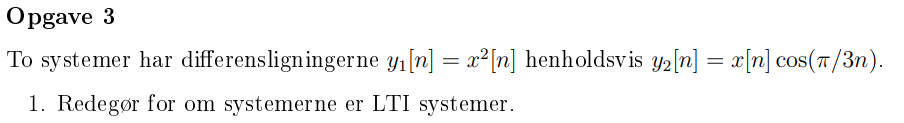

For at et system er LTI skal det være lineært og tids-invariant

Linearitet
\begin{align*}
y_a[n]&=x_a ^2[n]\\
y_b[n]&=x_b ^2[n]\\\\
x_c [n] &= ax_a[n]+bx_b[n]\\
y_c[n]&= x_c^2[n]\\
y_c[n]&= (ax_a[n]+bx_a[n])^2\\
y_c[n]&= a^2x_a^2[n]+b^2x_b^2[n]+abx_a[n]x_b[n]\\\\
ay_a[n]+by_b[n] &= x_a ^2[n] + x_b ^2[n]\\\\
y_c[n]& \neq ay_a[n]+by_b[n]
\end{align*}

linearitet holder ikke, d.v.s at systemet ikke kan være linært og jeg vælger derfor ikke at undersøge om det er tidsinvariant

$y_2 [n]$ undersøges nu, jeg starter med linearitet

\begin{align*}
y_a [n] &= x_a [n] \cos (\pi /3n)\\
y_b [n] &= x_b [n] \cos (\pi /3n)\\\\
x_c[n] &= ax_a [n]+bx_b [n]\\
y_c[n] &= x_a [n] \cos (\pi /3n)\\\\
y_c[n] &= (ax_a [n]+bx_b [n]) \cos (\pi /3n)\\
y_c[n] &= ax_a [n]\cos (\pi /3n)+bx_b [n]\cos (\pi /3n)\\\\
y_a [n]+y_b [n] &= x_a [n] \cos (\pi /3n) + x_b [n] \cos (\pi /3n)\\\\
y_c[n] &= y_a [n]+y_b [n] 
\end{align*}

d.v.s linearitet holder. Hvis tids-invarians også holder er $y_2[n]$ et LTI system

\begin{align*}
y_a[n] &= x_a [n] \cos (\pi /3n)\\
x_b[n] &= x_a [n-N_0]\\\\
y_b[n] &= x_b [n] \cos (\pi /3n)=x_a [n-N_0]\cos (\pi /3n)\\
y_a[n-N_0] &= x_a [n-N_0] \cos (\pi /3(n-N_0))\\\\
y_a[n-N_0] & \neq y_b[n]\\
\end{align*}

Da en tidsforsinkning i signalet ikke resulterer i en den samme tidsforsinkelse for hele systemet er systemet ikke tids-invariant og derfor ikke LTI

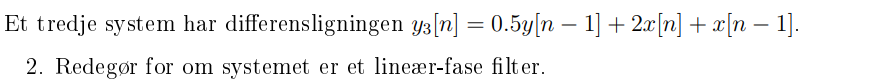

der antages at systemet skal forstås som $y_3[n]=0.5y_3[n-1]+2x[n]+x[n-1]$

Systemet z-transformeres og systemfunktionen H(z), bliver fundet

\begin{align*}
Y_3(z)&=0.5z^{-1}Y_3(z)+2X(z)+z^{-1}X(z)\\
Y_3(z)-0.5z^{-1}Y_3(z)&=2X(z)+z^{-1}X(z)\\
Y_3(z)(1-0.5z^{-1})&=X(z)(2+z^{-1})\\\\
Y_3(z)(1-0.5z^{-1})&=X(z)(2+z^{-1})\\\\
\frac{Y_3(z)}{X(z)} &= H(z)= \frac{2+z^{-1}}{1-0.5z^{-1}}\\
\end{align*}

Der evalueres på enhedscirkelen
$H(e^{jw}) = H(z) \rvert_{z=e^{jw}}=\frac{2+e^{-jw}}{1-0.5e^{-jw}}$

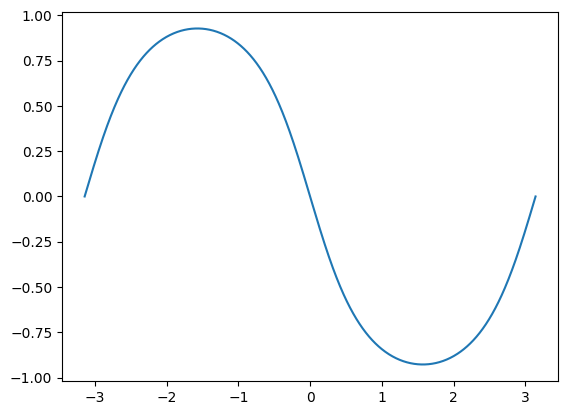

In [11]:
def H(o):
    return (2+np.exp(-1j*o))/(1-0.5*np.exp(-1j*o))
fig,ax =plt.subplots()
omega = np.linspace(-np.pi,np.pi,1000)
ax.plot(omega,np.angle(H(omega)))

Not sure

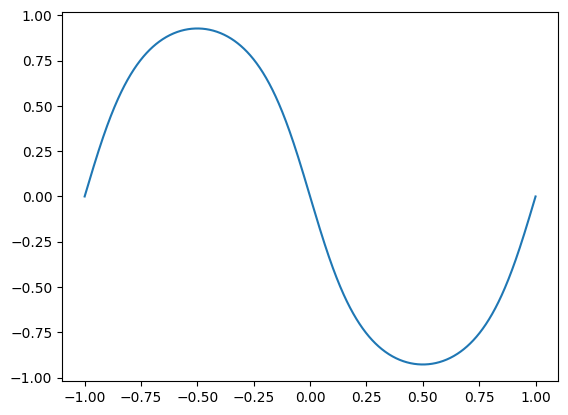

In [14]:
plt.plot(omega/np.pi,np.angle(H(omega)))


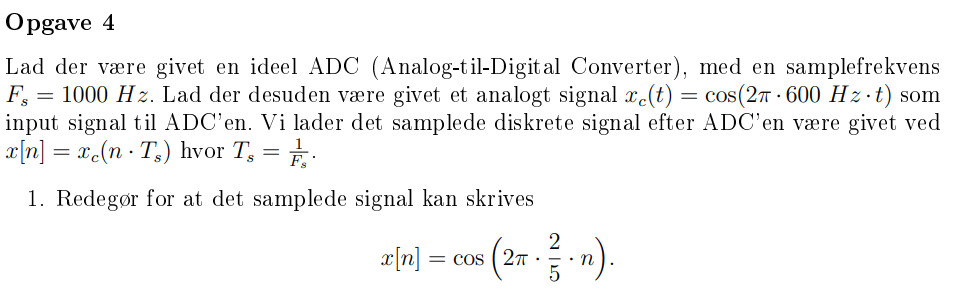

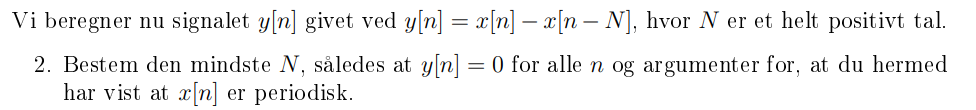

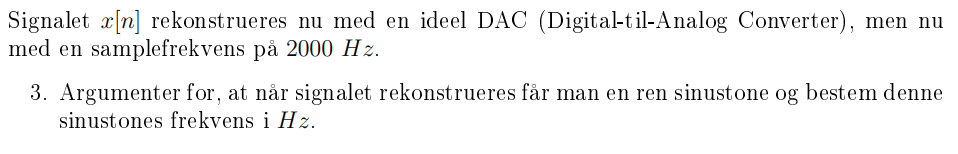

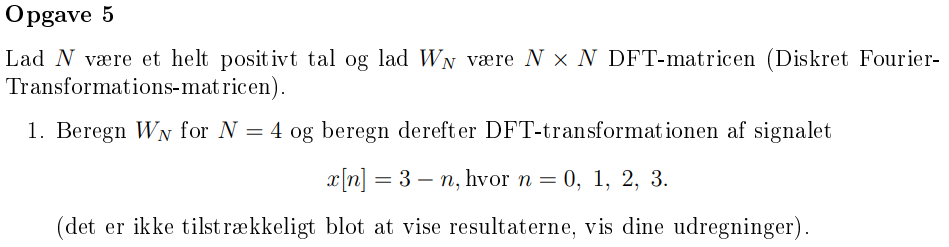

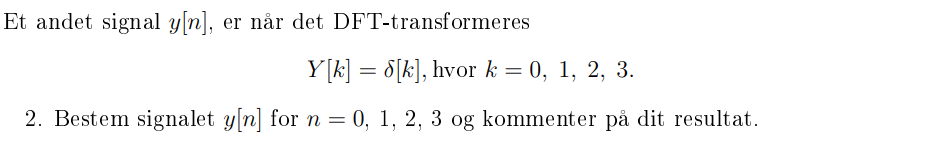

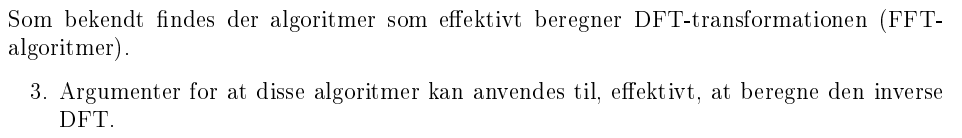